In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn import linear_model
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
import plotly.express as px
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [4]:
car = pd.read_csv("CarPrice_Assignment.csv" , sep = "," , encoding = 'utf-8')
car

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [5]:
car.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [7]:
car.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


<AxesSubplot:xlabel='price', ylabel='Count'>

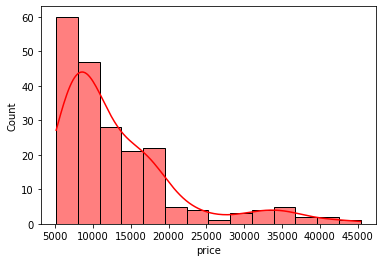

In [8]:
sns.histplot(data=car, x="price", kde=True, color = "red")

In [9]:
car['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

<AxesSubplot:ylabel='drivewheel'>

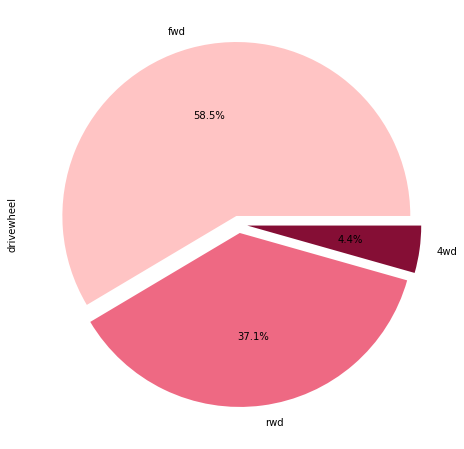

In [12]:
round(car['drivewheel'].value_counts()/ car.shape[0]*100,2).plot.pie(autopct = '%1.1f%%',figsize =(8,8),
explode=(0.05,0.05,0.05),colors=['#FFC4C4','#EE6983','#850E35'])

<AxesSubplot:xlabel='carbody', ylabel='price'>

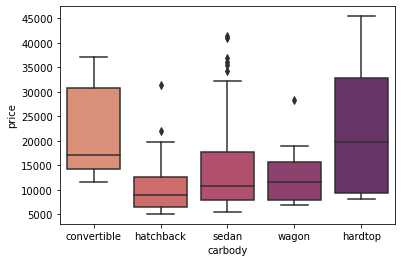

In [13]:
sns.boxplot(x="carbody", y="price", data=car,palette="flare")

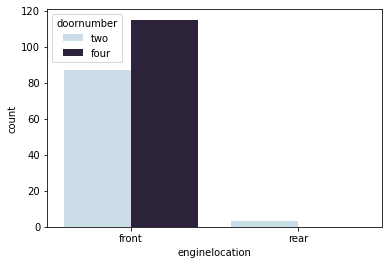

In [14]:
ax = sns.countplot(x="enginelocation", hue="doornumber", data=car,palette="ch:s=.25,rot=-.25")


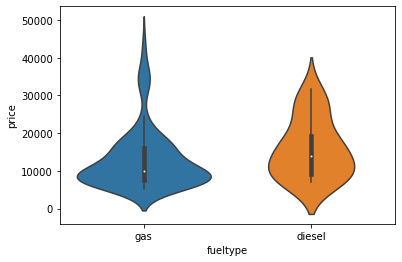

In [15]:
ax = sns.violinplot(x="fueltype", y="price", data=car)

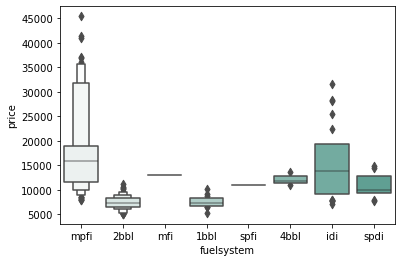

In [16]:
ax = sns.boxenplot(x="fuelsystem", y="price", data=car, palette="light:#5A9" )

In [17]:
car['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

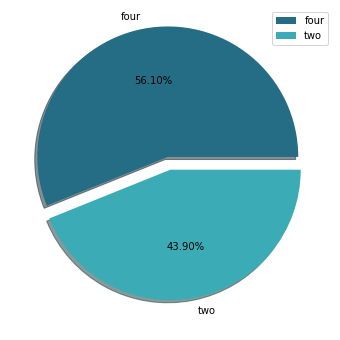

In [18]:
plt.figure(figsize= (6, 6))
data  = [115  , 90]
labels = ["four", "two"]
explode = [0.1, 0]
plt.pie(data ,labels= labels , explode = explode , autopct="%1.2f%%", shadow= True, colors= ['#256D85', '#3BACB6'])
plt.legend()
plt.show()

<AxesSubplot:xlabel='enginesize', ylabel='Density'>

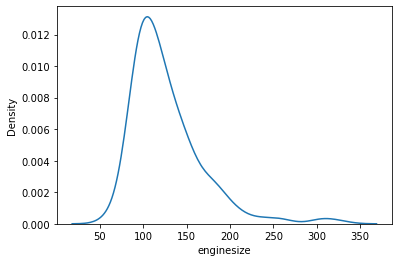

In [19]:
sns.kdeplot(data=car, x="enginesize")

In [20]:
car['enginesize'].mean()

126.90731707317073

<AxesSubplot:xlabel='price', ylabel='Count'>

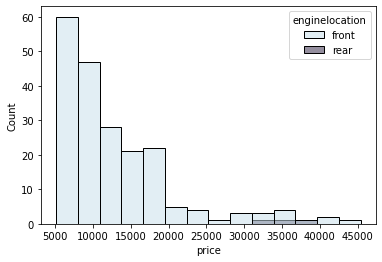

In [21]:
sns.histplot(data=car, x="price", hue="enginelocation", palette="ch:s=.25,rot=-.25")

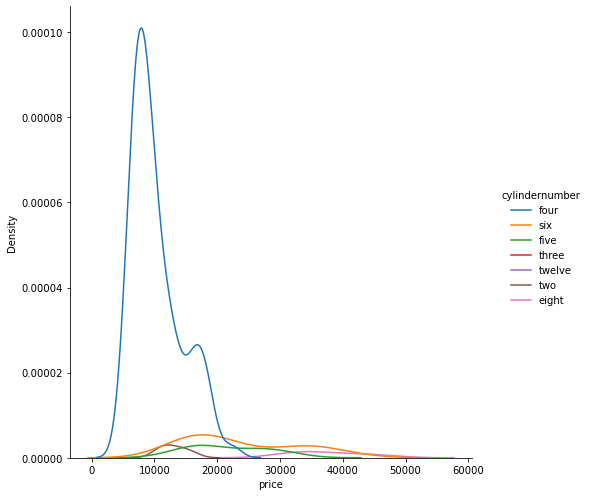

In [22]:
sns.displot(data=car, x="price", hue="cylindernumber",height=7,kind='kde')

<AxesSubplot:xlabel='enginetype', ylabel='citympg'>

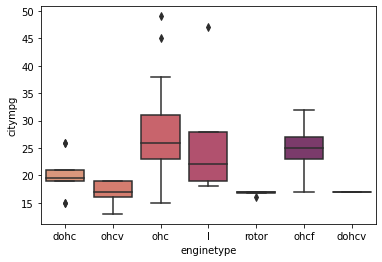

In [23]:
sns.boxplot(x="enginetype", y="citympg", data=car,palette="flare")

<AxesSubplot:xlabel='enginetype', ylabel='highwaympg'>

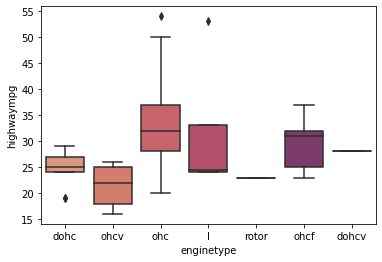

In [24]:
sns.boxplot(x="enginetype", y="highwaympg", data=car,palette="flare")

In [25]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [26]:
car.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

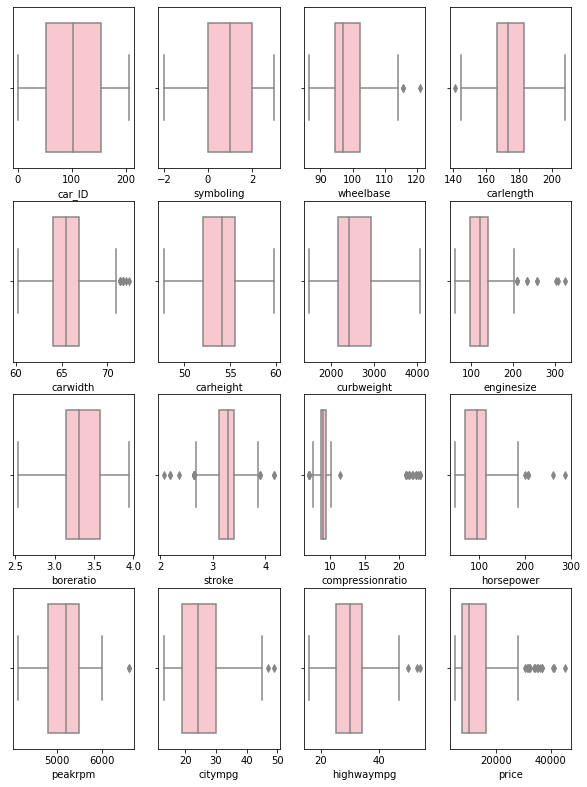

In [31]:
num_cols = list(car.select_dtypes(exclude='object').columns)
plt.figure(figsize=(10, 35))
for i in range(len(num_cols)):
    if i == 26:
        break
    else:
        plt.subplot(10,4, i+1)
        l = num_cols[i]
        sns.boxplot(car[l], color="pink" )

array([[<AxesSubplot:title={'center':'car_ID'}>,
        <AxesSubplot:title={'center':'symboling'}>,
        <AxesSubplot:title={'center':'wheelbase'}>,
        <AxesSubplot:title={'center':'carlength'}>],
       [<AxesSubplot:title={'center':'carwidth'}>,
        <AxesSubplot:title={'center':'carheight'}>,
        <AxesSubplot:title={'center':'curbweight'}>,
        <AxesSubplot:title={'center':'enginesize'}>],
       [<AxesSubplot:title={'center':'boreratio'}>,
        <AxesSubplot:title={'center':'stroke'}>,
        <AxesSubplot:title={'center':'compressionratio'}>,
        <AxesSubplot:title={'center':'horsepower'}>],
       [<AxesSubplot:title={'center':'peakrpm'}>,
        <AxesSubplot:title={'center':'citympg'}>,
        <AxesSubplot:title={'center':'highwaympg'}>,
        <AxesSubplot:title={'center':'price'}>]], dtype=object)

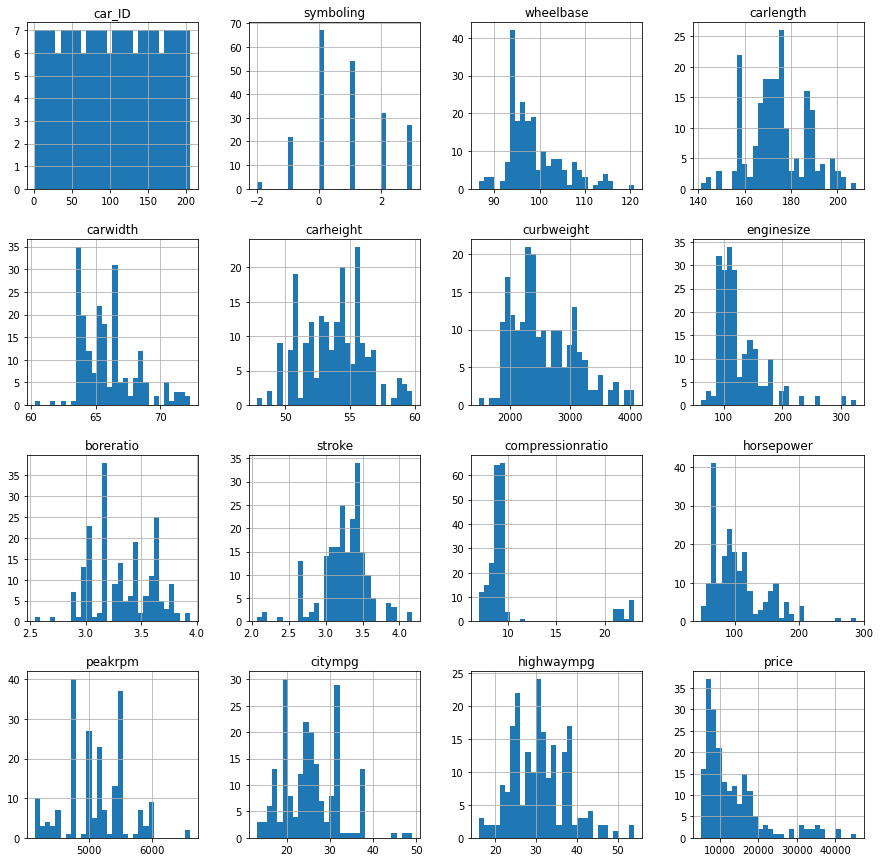

In [33]:
car.hist(bins=30,figsize=[15,15])

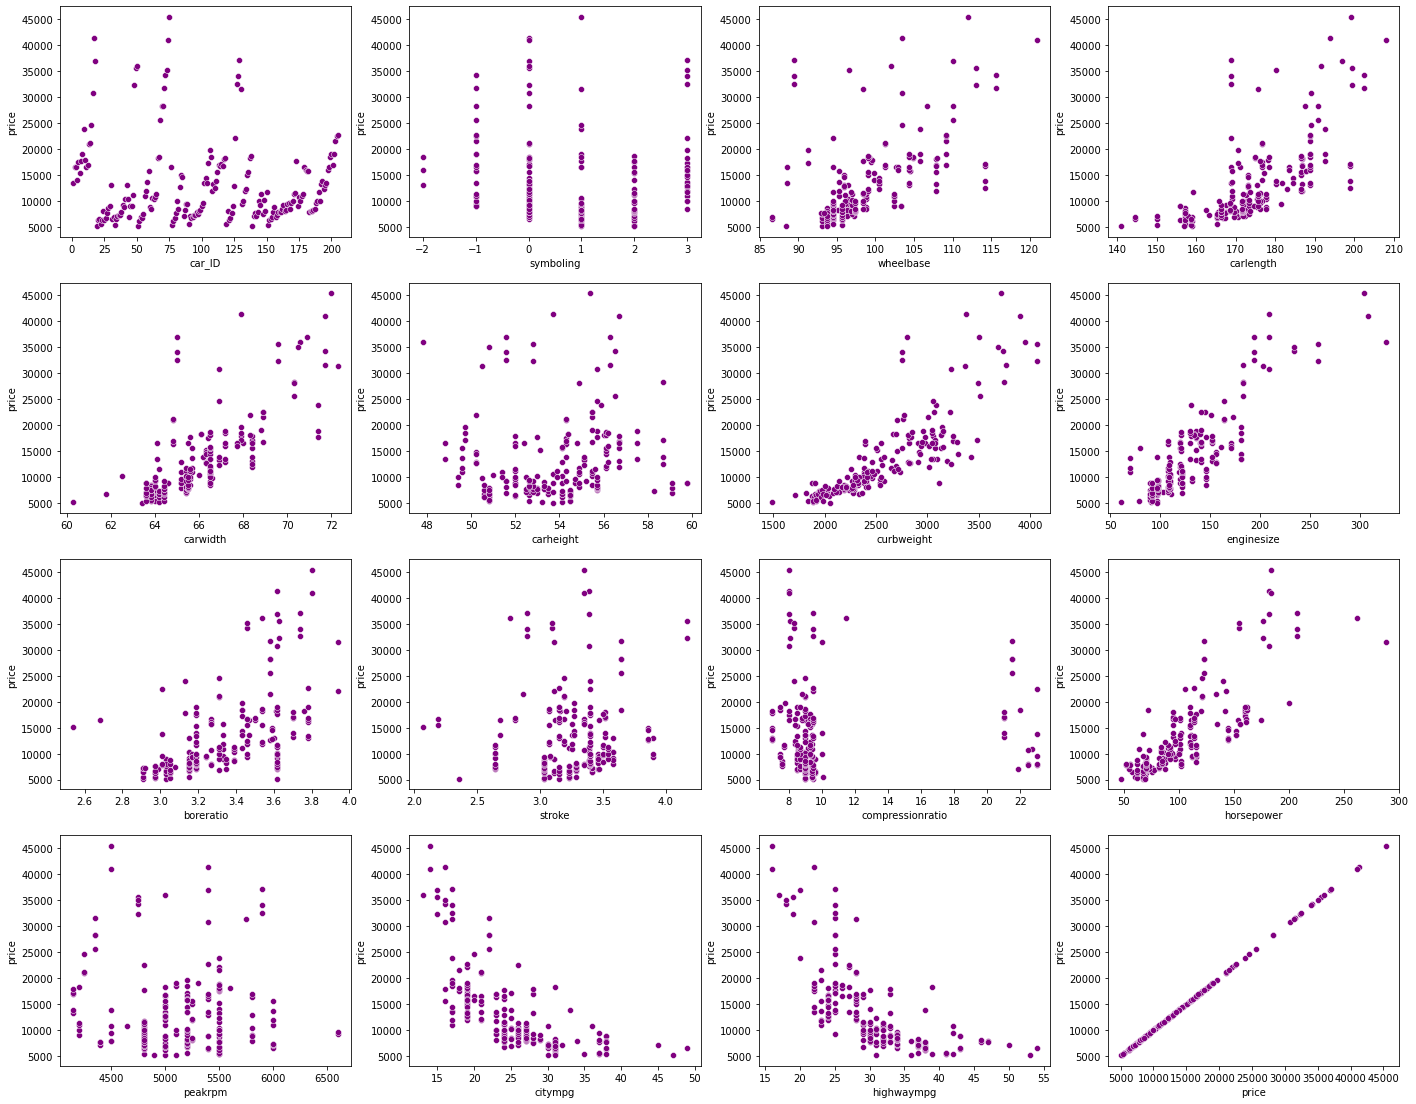

In [34]:
num_cols = list(car.select_dtypes(exclude='object').columns)
plt.figure(figsize=(24, 50))
for i in range(len(num_cols)):
    if i == 26:
        break
    else:
        plt.subplot(10,4, i+1)
        sns.scatterplot(data=car, x=num_cols[i], y='price' , color ="purple")

In [35]:
car["fueltype"].describe()

count     205
unique      2
top       gas
freq      185
Name: fueltype, dtype: object

In [36]:
car["fueltype"].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

<AxesSubplot:xlabel='fueltype', ylabel='Count'>

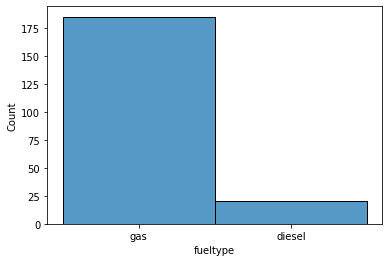

In [37]:
sns.histplot(data=car, x="fueltype")

In [38]:
del car['fueltype']
car

,car_ID,symboling,CarName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [39]:
car["enginelocation"].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [40]:
del car['enginelocation']

<AxesSubplot:xlabel='horsepower'>

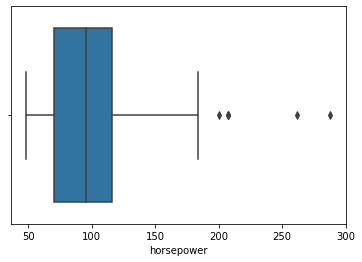

In [41]:
sns.boxplot(car['horsepower'])

In [42]:
firstQ_tb = car['horsepower'].quantile(0.25)
thirdQ_tb = car['horsepower'].quantile(0.75)
IQR_tb = thirdQ_tb - firstQ_tb
IQR_tb

46.0

In [43]:
newB_tb = thirdQ_tb + 3*(IQR_tb)
newB_tb

254.0

In [44]:
car[car['horsepower']>newB_tb].value_counts()

car_ID  symboling  CarName          aspiration  doornumber  carbody    drivewheel  wheelbase  carlength  carwidth  carheight  curbweight  enginetype  cylindernumber  enginesize  fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg  price  
50      0          jaguar xk        std         two         sedan      rwd         102.0      191.7      70.6      47.8       3950        ohcv        twelve          326         mpfi        3.54       2.76    11.5              262         5000     13       17          36000.0    1
130     1          porsche cayenne  std         two         hatchback  rwd         98.4       175.7      72.3      50.5       3366        dohcv       eight           203         mpfi        3.94       3.11    10.0              288         5750     17       28          31400.5    1
dtype: int64

In [45]:
car.drop(car[car['horsepower']>newB_tb].index, axis = 0, inplace =True)
car.shape

(203, 24)

In [46]:
car

,car_ID,symboling,CarName,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,std,two,convertible,rwd,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,std,two,convertible,rwd,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,std,two,hatchback,rwd,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,std,four,sedan,fwd,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,std,four,sedan,4wd,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),std,four,sedan,rwd,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,turbo,four,sedan,rwd,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,std,four,sedan,rwd,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,turbo,four,sedan,rwd,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


<AxesSubplot:xlabel='compressionratio'>

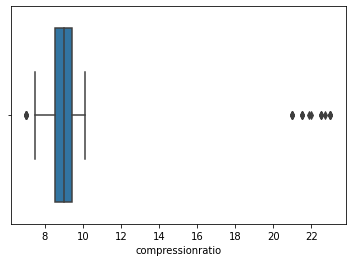

In [47]:
sns.boxplot(car['compressionratio'])

In [48]:
firstQ_tb = car['compressionratio'].quantile(0.25)
thirdQ_tb = car['compressionratio'].quantile(0.75)
IQR_tb = thirdQ_tb - firstQ_tb
IQR_tb

0.8499999999999996

In [49]:
newB_tb = thirdQ_tb + 3*(IQR_tb)
newB_tb

11.95

In [50]:
car[car['compressionratio']>newB_tb].value_counts()

car_ID  symboling  CarName                    aspiration  doornumber  carbody    drivewheel  wheelbase  carlength  carwidth  carheight  curbweight  enginetype  cylindernumber  enginesize  fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg  price  
64       0         mazda glc deluxe           std         four        sedan      fwd         98.8       177.8      66.5      55.5       2443        ohc         four            122         idi         3.39       3.39    22.7              64          4650     36       42          10795.0    1
67       0         mazda rx-7 gs              std         four        sedan      rwd         104.9      175.0      66.1      54.4       2700        ohc         four            134         idi         3.43       3.64    22.0              72          4200     31       39          18344.0    1
193      0         volkswagen rabbit custom   turbo       four        sedan      fwd         100.4      180.2      66.9      55.1

In [51]:
car.drop(car[car['compressionratio']>newB_tb].index, axis = 0, inplace =True)
car.shape

(183, 24)

<AxesSubplot:xlabel='enginesize'>

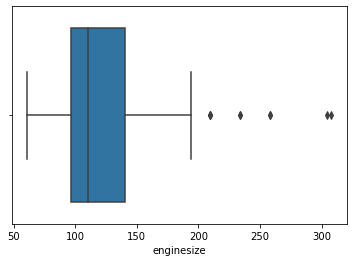

In [52]:
sns.boxplot(car['enginesize'])

In [53]:
firstQ_tb = car['enginesize'].quantile(0.25)
thirdQ_tb = car['enginesize'].quantile(0.75)
IQR_tb = thirdQ_tb - firstQ_tb
IQR_tb

43.5

In [54]:
newB_tb = thirdQ_tb + 3*(IQR_tb)
newB_tb
car[car['enginesize']>newB_tb].value_counts()
car.drop(car[car['enginesize']>newB_tb].index, axis = 0, inplace =True)
car.shape

(181, 24)

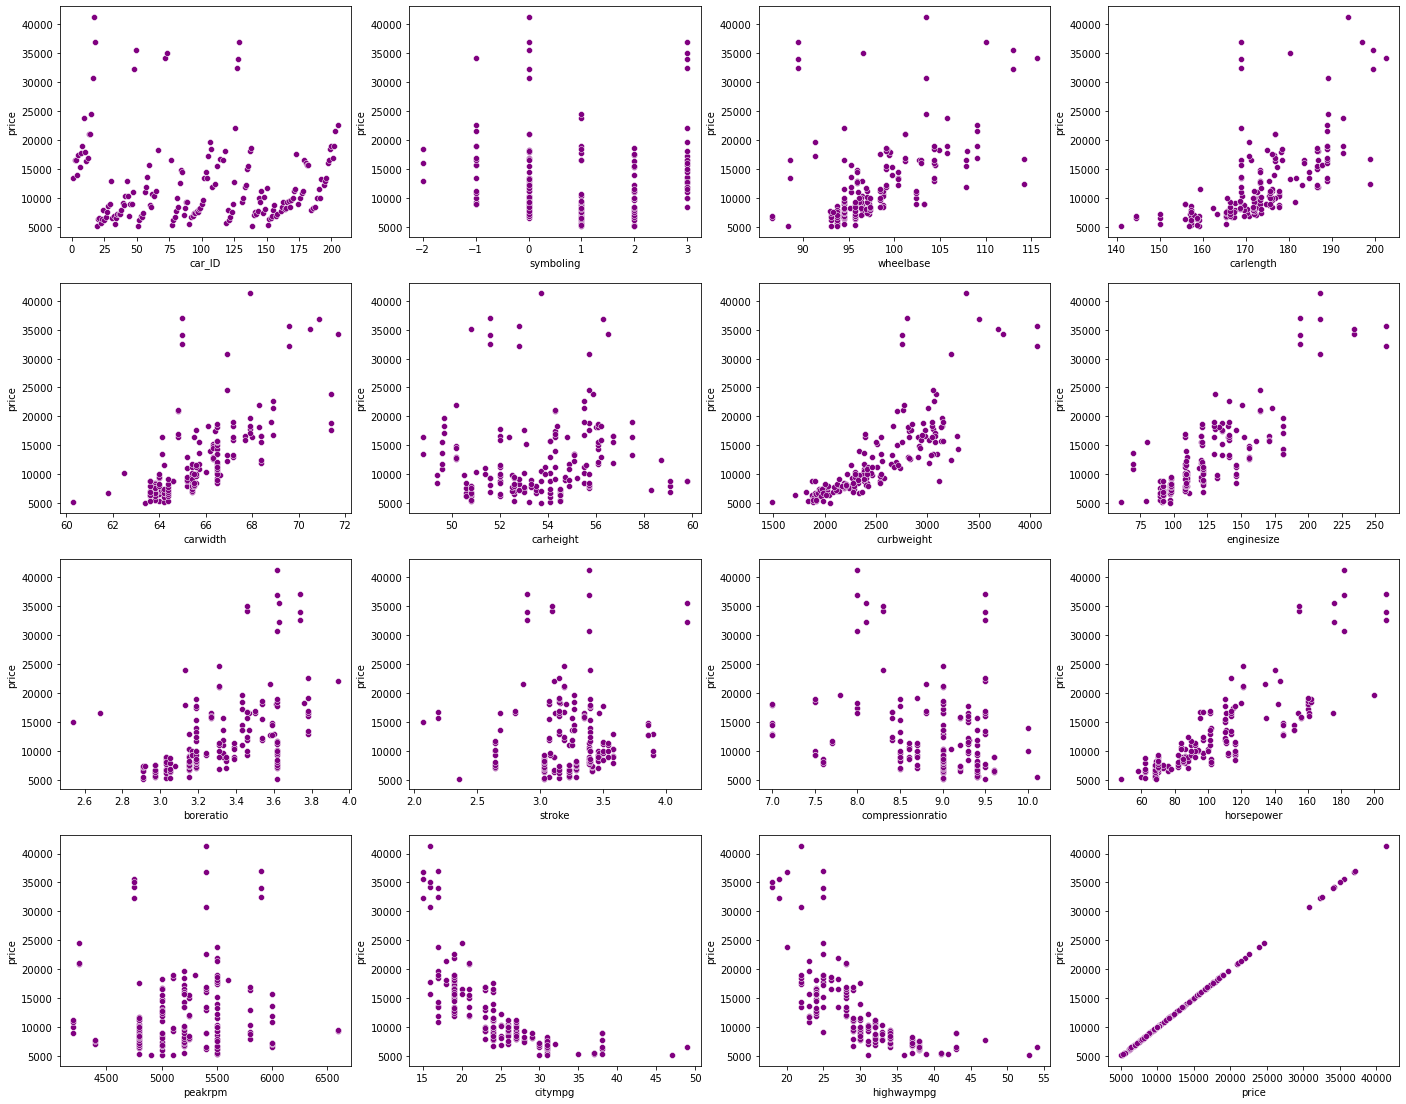

In [55]:
num_cols = list(car.select_dtypes(exclude='object').columns)
plt.figure(figsize=(24, 50))
for i in range(len(num_cols)):
    if i == 26:
        break
    else:
        plt.subplot(10,4, i+1)
        sns.scatterplot(data=car, x=num_cols[i], y='price' , color ="purple")

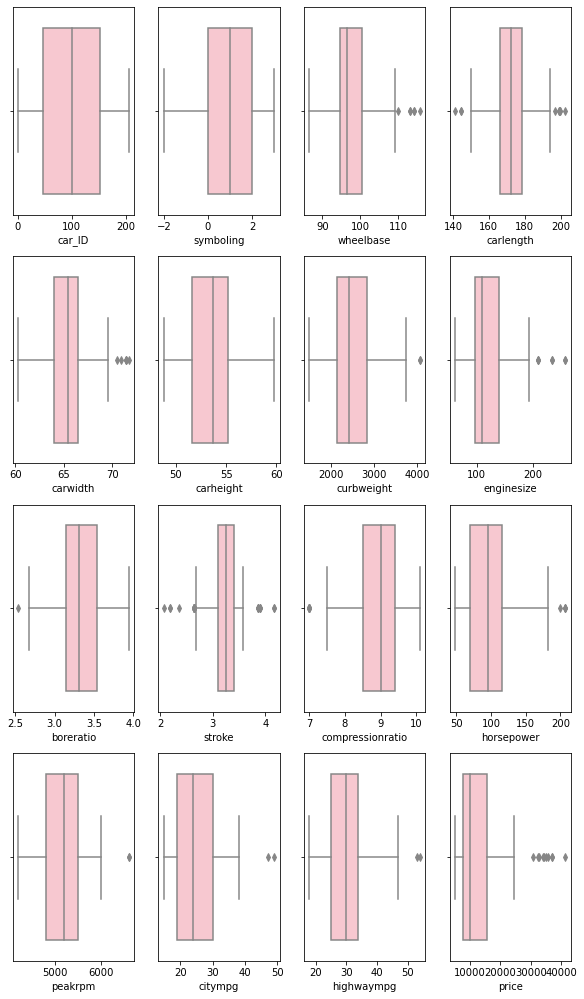

In [57]:
num_cols = list(car.select_dtypes(exclude='object').columns)
plt.figure(figsize=(10, 45))
for i in range(len(num_cols)):
    if i == 26:
        break
    else:
        plt.subplot(10,4, i+1)
        l = num_cols[i]
        sns.boxplot(car[l], color="pink" )

In [58]:
car.select_dtypes('object')

,CarName,aspiration,doornumber,carbody,drivewheel,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,std,two,convertible,rwd,dohc,four,mpfi
1,alfa-romero stelvio,std,two,convertible,rwd,dohc,four,mpfi
2,alfa-romero Quadrifoglio,std,two,hatchback,rwd,ohcv,six,mpfi
3,audi 100 ls,std,four,sedan,fwd,ohc,four,mpfi
4,audi 100ls,std,four,sedan,4wd,ohc,five,mpfi
...,...,...,...,...,...,...,...,...
199,volvo diesel,turbo,four,wagon,rwd,ohc,four,mpfi
200,volvo 145e (sw),std,four,sedan,rwd,ohc,four,mpfi
201,volvo 144ea,turbo,four,sedan,rwd,ohc,four,mpfi
202,volvo 244dl,std,four,sedan,rwd,ohcv,six,mpfi


In [59]:
car.select_dtypes('object')

,CarName,aspiration,doornumber,carbody,drivewheel,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,std,two,convertible,rwd,dohc,four,mpfi
1,alfa-romero stelvio,std,two,convertible,rwd,dohc,four,mpfi
2,alfa-romero Quadrifoglio,std,two,hatchback,rwd,ohcv,six,mpfi
3,audi 100 ls,std,four,sedan,fwd,ohc,four,mpfi
4,audi 100ls,std,four,sedan,4wd,ohc,five,mpfi
...,...,...,...,...,...,...,...,...
199,volvo diesel,turbo,four,wagon,rwd,ohc,four,mpfi
200,volvo 145e (sw),std,four,sedan,rwd,ohc,four,mpfi
201,volvo 144ea,turbo,four,sedan,rwd,ohc,four,mpfi
202,volvo 244dl,std,four,sedan,rwd,ohcv,six,mpfi


In [61]:
le = LabelEncoder()
drivewheel_le = LabelEncoder()
car['drivewheel'] = drivewheel_le.fit_transform(car['drivewheel'])
car['drivewheel'].value_counts()

1    111
2     61
0      9
Name: drivewheel, dtype: int64

In [62]:
car.select_dtypes('object')

,CarName,aspiration,doornumber,carbody,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,std,two,convertible,dohc,four,mpfi
1,alfa-romero stelvio,std,two,convertible,dohc,four,mpfi
2,alfa-romero Quadrifoglio,std,two,hatchback,ohcv,six,mpfi
3,audi 100 ls,std,four,sedan,ohc,four,mpfi
4,audi 100ls,std,four,sedan,ohc,five,mpfi
...,...,...,...,...,...,...,...
199,volvo diesel,turbo,four,wagon,ohc,four,mpfi
200,volvo 145e (sw),std,four,sedan,ohc,four,mpfi
201,volvo 144ea,turbo,four,sedan,ohc,four,mpfi
202,volvo 244dl,std,four,sedan,ohcv,six,mpfi


In [63]:
car['doornumber'].value_counts()

four    97
two     84
Name: doornumber, dtype: int64

In [64]:
le = LabelEncoder()
doornumber_le = LabelEncoder()
car['doornumber'] = doornumber_le.fit_transform(car['doornumber'])
car['doornumber'].value_counts()

0    97
1    84
Name: doornumber, dtype: int64

In [65]:
car['aspiration'].value_counts()

std      157
turbo     24
Name: aspiration, dtype: int64

In [66]:
le = LabelEncoder()
aspiration_le = LabelEncoder()
car['aspiration'] = aspiration_le.fit_transform(car['aspiration'])
car['aspiration'].value_counts()

0    157
1     24
Name: aspiration, dtype: int64

In [67]:
car.select_dtypes('object')

,CarName,carbody,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,convertible,dohc,four,mpfi
1,alfa-romero stelvio,convertible,dohc,four,mpfi
2,alfa-romero Quadrifoglio,hatchback,ohcv,six,mpfi
3,audi 100 ls,sedan,ohc,four,mpfi
4,audi 100ls,sedan,ohc,five,mpfi
...,...,...,...,...,...
199,volvo diesel,wagon,ohc,four,mpfi
200,volvo 145e (sw),sedan,ohc,four,mpfi
201,volvo 144ea,sedan,ohc,four,mpfi
202,volvo 244dl,sedan,ohcv,six,mpfi


In [68]:
car['fuelsystem'].value_counts()

mpfi    90
2bbl    66
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

In [69]:
le = LabelEncoder()
fuelsystem_le = LabelEncoder()
car['fuelsystem'] = fuelsystem_le.fit_transform(car['fuelsystem'])
car['fuelsystem'].value_counts()

4    90
1    66
0    11
5     9
2     3
3     1
6     1
Name: fuelsystem, dtype: int64

In [70]:
car.select_dtypes('object')

,CarName,carbody,enginetype,cylindernumber
0,alfa-romero giulia,convertible,dohc,four
1,alfa-romero stelvio,convertible,dohc,four
2,alfa-romero Quadrifoglio,hatchback,ohcv,six
3,audi 100 ls,sedan,ohc,four
4,audi 100ls,sedan,ohc,five
...,...,...,...,...
199,volvo diesel,wagon,ohc,four
200,volvo 145e (sw),sedan,ohc,four
201,volvo 144ea,sedan,ohc,four
202,volvo 244dl,sedan,ohcv,six


In [71]:
car['enginetype'].value_counts()

ohc      133
ohcf      15
dohc      12
ohcv      10
l          7
rotor      4
Name: enginetype, dtype: int64

In [72]:
le = LabelEncoder()
enginetype_le = LabelEncoder()
car['enginetype'] = enginetype_le.fit_transform(car['enginetype'])
car['enginetype'].value_counts()

2    133
3     15
0     12
4     10
1      7
5      4
Name: enginetype, dtype: int64

In [73]:
car['cylindernumber'].value_counts()

four     144
six       23
five       7
two        4
eight      2
three      1
Name: cylindernumber, dtype: int64

In [74]:
le = LabelEncoder()
cylindernumber_le = LabelEncoder()
car['cylindernumber'] = cylindernumber_le.fit_transform(car['cylindernumber'])
car['cylindernumber'].value_counts()

2    144
3     23
1      7
5      4
0      2
4      1
Name: cylindernumber, dtype: int64

In [75]:
car.select_dtypes('object')

,CarName,carbody
0,alfa-romero giulia,convertible
1,alfa-romero stelvio,convertible
2,alfa-romero Quadrifoglio,hatchback
3,audi 100 ls,sedan
4,audi 100ls,sedan
...,...,...
199,volvo diesel,wagon
200,volvo 145e (sw),sedan
201,volvo 144ea,sedan
202,volvo 244dl,sedan


In [76]:
car['carbody'].value_counts()

sedan          79
hatchback      68
wagon          22
convertible     6
hardtop         6
Name: carbody, dtype: int64

In [77]:
le = LabelEncoder()
carbody_le = LabelEncoder()
car['carbody'] = carbody_le.fit_transform(car['carbody'])
car['carbody'].value_counts()

3    79
2    68
4    22
0     6
1     6
Name: carbody, dtype: int64

In [78]:
car['CarName'].value_counts()

toyota corona          5
toyota corolla         5
peugeot 504            4
subaru dl              4
mazda 626              3
                      ..
maxda rx3              1
jaguar xf              1
jaguar xj              1
isuzu D-Max V-Cross    1
volvo diesel           1
Name: CarName, Length: 131, dtype: int64

In [79]:
car

,car_ID,symboling,CarName,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,0,1,0,2,88.6,168.8,64.1,...,130,4,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,0,1,0,2,88.6,168.8,64.1,...,130,4,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,0,1,2,2,94.5,171.2,65.5,...,152,4,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,0,0,3,1,99.8,176.6,66.2,...,109,4,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,0,0,3,0,99.4,176.6,66.4,...,136,4,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,200,-1,volvo diesel,1,0,4,2,104.3,188.8,67.2,...,130,4,3.62,3.15,7.5,162,5100,17,22,18950.0
200,201,-1,volvo 145e (sw),0,0,3,2,109.1,188.8,68.9,...,141,4,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,1,0,3,2,109.1,188.8,68.8,...,141,4,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,0,0,3,2,109.1,188.8,68.9,...,173,4,3.58,2.87,8.8,134,5500,18,23,21485.0


<AxesSubplot:>

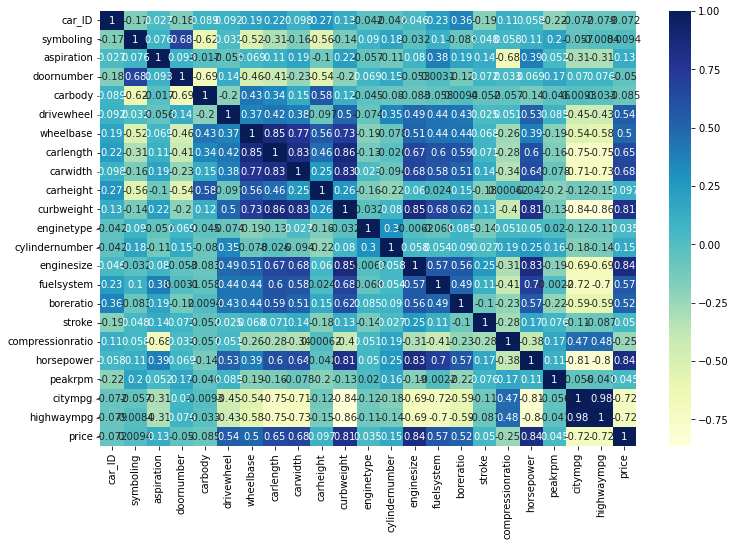

In [80]:
plt.figure(figsize= (12,8))
sns.heatmap(car.corr() , annot = True , cmap = "YlGnBu")

In [81]:
split_data = car.copy()
split_data.columns

Index(['car_ID', 'symboling', 'CarName', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [82]:
split_data = split_data[['doornumber','carbody','drivewheel', 'wheelbase', 'carlength','enginetype', 'cylindernumber',
                         'enginesize','boreratio','horsepower','peakrpm','highwaympg', 'price']]
split_data

,doornumber,carbody,drivewheel,wheelbase,carlength,enginetype,cylindernumber,enginesize,boreratio,horsepower,peakrpm,highwaympg,price
0,1,0,2,88.6,168.8,0,2,130,3.47,111,5000,27,13495.0
1,1,0,2,88.6,168.8,0,2,130,3.47,111,5000,27,16500.0
2,1,2,2,94.5,171.2,4,3,152,2.68,154,5000,26,16500.0
3,0,3,1,99.8,176.6,2,2,109,3.19,102,5500,30,13950.0
4,0,3,0,99.4,176.6,2,1,136,3.19,115,5500,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,0,4,2,104.3,188.8,2,2,130,3.62,162,5100,22,18950.0
200,0,3,2,109.1,188.8,2,2,141,3.78,114,5400,28,16845.0
201,0,3,2,109.1,188.8,2,2,141,3.78,160,5300,25,19045.0
202,0,3,2,109.1,188.8,4,3,173,3.58,134,5500,23,21485.0


In [83]:
x =split_data.drop(["price"],axis=1).values
y= split_data['price'].values

In [84]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [85]:
ro_scaler = RobustScaler()
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)

In [86]:
reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [87]:
reg.score(x_train,y_train)

0.8265076688790641

In [88]:
reg.score(x_test,y_test)

0.6621412338223734

In [89]:
reg.intercept_

10558.066408700282

In [90]:
reg.coef_

array([-1850.06711061,  -757.42523249,  1058.62011872,  1060.67698436,
          37.74912324,   141.64353789,  -200.44902995,  3200.75023889,
        -139.51295837,  2778.69619452,  1119.24429936,  -912.5896207 ])

In [91]:
pd.DataFrame(reg.coef_ , split_data.columns[:-1] , columns=['Coeficient'])

,Coeficient
doornumber,-1850.067111
carbody,-757.425232
drivewheel,1058.620119
wheelbase,1060.676984
carlength,37.749123
enginetype,141.643538
cylindernumber,-200.449030
enginesize,3200.750239
boreratio,-139.512958
horsepower,2778.696195


In [92]:
y_pred = reg.predict(x_test)
df = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
df.head(10)

,Y_test,Y_pred
0,6295.0,7080.207661
1,10345.0,10110.533886
2,11549.0,14002.416996
3,9279.0,12582.078410
4,8058.0,7534.671198
5,30760.0,23923.217890
6,6229.0,9216.093013
7,6189.0,7490.933229
8,37028.0,21967.773698
9,15040.0,12520.548396


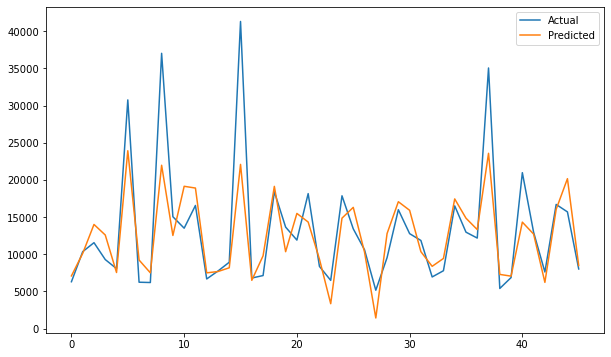

In [93]:
plt.figure(figsize=(10,6))
plt.plot(df[:50])
plt.legend(['Actual' , 'Predicted'])

In [94]:
reg_score = r2_score(y_test , y_pred)
reg_score

0.6621412338223734

In [95]:
p = len(x_train[0])
n = len(y_train)
adj_R2 = 1-(1-reg_score)*(n-1)/(n-p-1)
adj_R2

0.6289092240344102

In [96]:
adj_R2 < reg_score

True

In [97]:
mse = mean_squared_error(y_test , y_pred)
mse

22646792.44847424

In [99]:
mae = mean_absolute_error(y_test , y_pred)
mae

2973.437351992181

In [100]:
mpae= mean_absolute_percentage_error(y_test,y_pred)
mpae

0.207877734379138

In [101]:
reg_mse = mean_squared_error(y_test,y_pred)
reg_rmse= np.sqrt(reg_mse)
reg_rmse

4758.864617582039